In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

# Get Data From API 

In [2]:
api_1 = 'https://datasets-server.huggingface.co/first-rows?dataset=indonlu&config=emot&split=train'
api_2 = 'https://datasets-server.huggingface.co/first-rows?dataset=indonlu&config=emot&split=validation'
api_3 = "https://datasets-server.huggingface.co/first-rows?dataset=indonlu&config=emot&split=test"
get_data = requests.get(api_1)
data = get_data.json()

In [3]:
tweet = []
label = []

#Api_1
for i in range(len(data['rows'])):
    tweet.append(data['rows'][i]['row']['tweet'])
    label.append(data['rows'][i]['row']['label'])
    
#Api_2
for j in range(len(data['rows'])):
    tweet.append(data['rows'][j]['row']['tweet'])
    label.append(data['rows'][j]['row']['label'])

#Api_3
for z in range(len(data['rows'])):
    tweet.append(data['rows'][z]['row']['tweet'])
    label.append(data['rows'][z]['row']['label'])

In [4]:
tweet = np.array(tweet)
label = np.array(label)

In [5]:
df = pd.DataFrame(data = [tweet, label]).T
df.columns = ['tweet','label']

In [6]:
df

,tweet,label
0,Ini adalah hal yang paling membahagiakan saat ...,4
1,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,1
2,yaudah kalo emang belum berani potong rambut p...,3
3,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",3
4,temen2 masa kecil yang turned out being asshol...,1
...,...,...
295,ini kakinya diapain sih harusnya ya ampun saki...,0
296,"Niat hati mau regis sim card, udah selesai mas...",1
297,Nangroe Aceh Darussalam memang Istimewa Al Fat...,2
298,"Cuma liat notifikasi WA dibalas, senengnya set...",2


C:\Users\adiba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


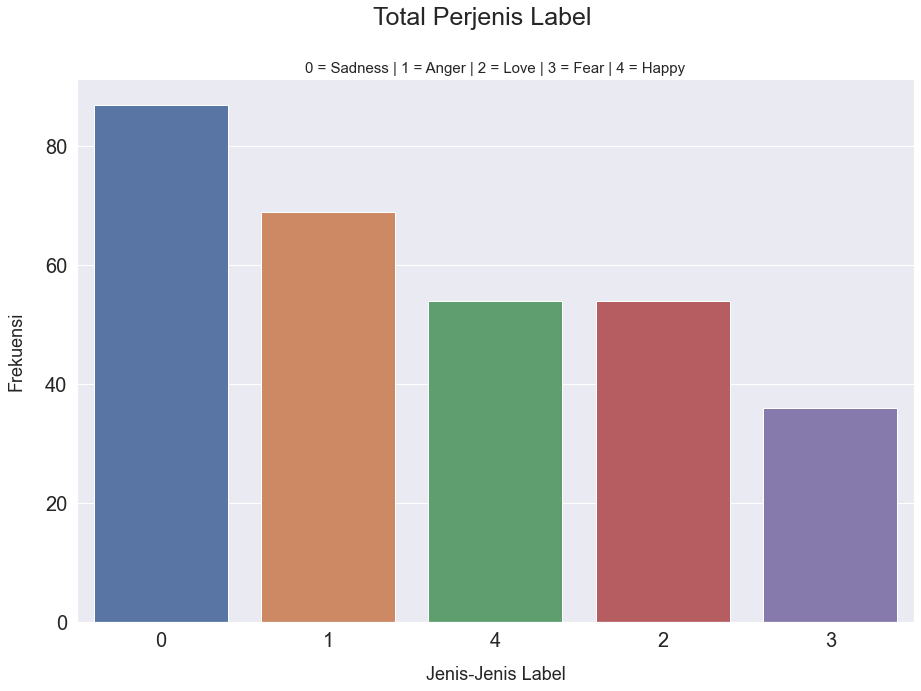

In [7]:
plt.figure(figsize = (15,10))
sns.set(style = 'darkgrid')
sns.countplot(df['label'], 
              order = df['label'].value_counts().index)

plt.suptitle('Total Perjenis Label', fontsize = 25)
plt.title('0 = Sadness | 1 = Anger | 2 = Love | 3 = Fear | 4 = Happy', fontsize = 15)
plt.xlabel('Jenis-Jenis Label', fontsize = 18, labelpad = 15)
plt.ylabel('Frekuensi', fontsize = 18, labelpad = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig("total_masing_masing_kategori.png")
plt.show()

# Text Preprocessing

In [8]:
import tensorflow as tf
from tensorflow import keras
import re
import string

## Cleansing Dataset 

In [9]:
#Menghapus punctuation
def hapus_punct(text):
    trans = str.maketrans("", "", string.punctuation)
    return text.translate(trans)

def hapus_angka(text):
    return re.sub(r"\d+","",text)

def hapus_multi_whitespace(text):
    return re.sub('\s+', ' ', text)

In [10]:
df['preprocessing'] = df['tweet'].apply(hapus_punct)
df['preprocessing'] = df['preprocessing'].apply(hapus_angka)
df['preprocessing'] = df['preprocessing'].apply(hapus_multi_whitespace)

In [11]:
df

,tweet,label,preprocessing
0,Ini adalah hal yang paling membahagiakan saat ...,4,Ini adalah hal yang paling membahagiakan saat ...
1,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,1,USERNAME USERNAME Dari pertama USERNAME mendud...
2,yaudah kalo emang belum berani potong rambut p...,3,yaudah kalo emang belum berani potong rambut p...
3,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",3,Jadi semalam gw rekap eh intinya yg gw usahain...
4,temen2 masa kecil yang turned out being asshol...,1,temen masa kecil yang turned out being asshole...
...,...,...,...
295,ini kakinya diapain sih harusnya ya ampun saki...,0,ini kakinya diapain sih harusnya ya ampun saki...
296,"Niat hati mau regis sim card, udah selesai mas...",1,Niat hati mau regis sim card udah selesai masu...
297,Nangroe Aceh Darussalam memang Istimewa Al Fat...,2,Nangroe Aceh Darussalam memang Istimewa Al Fat...
298,"Cuma liat notifikasi WA dibalas, senengnya set...",2,Cuma liat notifikasi WA dibalas senengnya sete...


## Stopwords 

In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
stoplist = set(stopwords.words("indonesian"))
def remove_stopwords(text):
    return [teks.lower() for teks in text.split() if teks.lower() not in stoplist]

In [14]:
df['preprocessing'] = df.preprocessing.apply(remove_stopwords)

In [15]:
df

,tweet,label,preprocessing
0,Ini adalah hal yang paling membahagiakan saat ...,4,"[membahagiakan, biasku, foto, elf, returnofthe..."
1,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,1,"[username, username, username, menduduki, bang..."
2,yaudah kalo emang belum berani potong rambut p...,3,"[yaudah, kalo, emang, berani, potong, rambut, ..."
3,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",3,"[semalam, gw, rekap, eh, intinya, yg, gw, usah..."
4,temen2 masa kecil yang turned out being asshol...,1,"[temen, turned, out, being, asshole, kalo, cew..."
...,...,...,...
295,ini kakinya diapain sih harusnya ya ampun saki...,0,"[kakinya, diapain, sih, ya, ampun, sakit, bang..."
296,"Niat hati mau regis sim card, udah selesai mas...",1,"[niat, hati, regis, sim, card, udah, selesai, ..."
297,Nangroe Aceh Darussalam memang Istimewa Al Fat...,2,"[nangroe, aceh, darussalam, istimewa, al, fati..."
298,"Cuma liat notifikasi WA dibalas, senengnya set...",2,"[liat, notifikasi, wa, dibalas, senengnya, mat..."


## Steaming

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

feature = StemmerFactory()
stemmer = feature.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for dokumen in df['preprocessing']:
    for term in dokumen:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

def get_stemmed_term(dokumen):
    return [term_dict[term] for term in dokumen]

def remove_array(dokumen):
    d = [word for word in dokumen]
    return " ".join(d)

In [17]:
df['preprocessing'] = df['preprocessing'].apply(get_stemmed_term)
df['preprocessing'] = df['preprocessing'].map(remove_array)
df

,tweet,label,preprocessing
0,Ini adalah hal yang paling membahagiakan saat ...,4,bahagia bias foto elf returnofthelittleprince ...
1,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,1,username username username duduk bangku jabat ...
2,yaudah kalo emang belum berani potong rambut p...,3,yaudah kalo emang berani potong rambut pendek ...
3,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",3,malam gw rekap eh inti yg gw usahain kerja zer...
4,temen2 masa kecil yang turned out being asshol...,1,temen turned out being asshole kalo cewe ukhti...
...,...,...,...
295,ini kakinya diapain sih harusnya ya ampun saki...,0,kaki diapain sih ya ampun sakit banget nyeri o...
296,"Niat hati mau regis sim card, udah selesai mas...",1,niat hati regis sim card udah selesai masukin ...
297,Nangroe Aceh Darussalam memang Istimewa Al Fat...,2,nangroe aceh darussalam istimewa al fatihah te...
298,"Cuma liat notifikasi WA dibalas, senengnya set...",2,liat notifikasi wa balas neng matigembiranya b...


In [18]:
df['panjang_dokumen'] = [len(dokumen) for dokumen in df['preprocessing']]

In [19]:
df

,tweet,label,preprocessing,panjang_dokumen
0,Ini adalah hal yang paling membahagiakan saat ...,4,bahagia bias foto elf returnofthelittleprince ...,61
1,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...,1,username username username duduk bangku jabat ...,145
2,yaudah kalo emang belum berani potong rambut p...,3,yaudah kalo emang berani potong rambut pendek ...,149
3,"Jadi semalam, gw rekap, eh intinya yg gw usaha...",3,malam gw rekap eh inti yg gw usahain kerja zer...,102
4,temen2 masa kecil yang turned out being asshol...,1,temen turned out being asshole kalo cewe ukhti...,143
...,...,...,...,...
295,ini kakinya diapain sih harusnya ya ampun saki...,0,kaki diapain sih ya ampun sakit banget nyeri o...,113
296,"Niat hati mau regis sim card, udah selesai mas...",1,niat hati regis sim card udah selesai masukin ...,118
297,Nangroe Aceh Darussalam memang Istimewa Al Fat...,2,nangroe aceh darussalam istimewa al fatihah te...,112
298,"Cuma liat notifikasi WA dibalas, senengnya set...",2,liat notifikasi wa balas neng matigembiranya b...,153


# Cek Hasil

In [20]:
from collections import Counter

In [21]:
def counter_word(text):
    count = Counter()
    for teks in text.values:
        for word in teks.split():
            count[word] += 1
    return count

counter = counter_word(df['preprocessing'])

In [22]:
panjang_token = len(counter)
panjang_token

1052

In [23]:
print('5 Token Paling Banyak Muncul\n', counter.most_common(5))

5 Token Paling Banyak Muncul
 [('yg', 141), ('username', 135), ('cinta', 63), ('kalo', 57), ('aja', 54)]


# Split Dataset

In [24]:
train_size = int(df.shape[0] * 0.9)
train_df = df[:train_size]
val_df = df[train_size:]

In [25]:
train_sentences = train_df.preprocessing.to_numpy()
val_sentences = val_df.preprocessing.to_numpy()

train_label = train_df.label.to_numpy().astype(np.int64)
val_label = val_df.label.to_numpy().astype(np.int64)

In [26]:
train_sentences.shape, val_sentences.shape

((270,), (30,))

# Tokenizing

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
tokenizer = Tokenizer(num_words = panjang_token)
tokenizer.fit_on_texts(train_sentences)

In [29]:
#Melihat word hasil tokenizer
word_index = tokenizer.word_index
word_index

{'yg': 1,
 'username': 2,
 'cinta': 3,
 'kalo': 4,
 'url': 5,
 'aja': 6,
 'orang': 7,
 'ya': 8,
 'udah': 9,
 'gitu': 10,
 'gak': 11,
 'ga': 12,
 'sayang': 13,
 'takut': 14,
 'sih': 15,
 'gue': 16,
 'gw': 17,
 'jalan': 18,
 'suka': 19,
 'bahagia': 20,
 'bikin': 21,
 'gua': 22,
 'org': 23,
 'hasil': 24,
 'tau': 25,
 'rakyat': 26,
 'liat': 27,
 'emang': 28,
 'ku': 29,
 'kau': 30,
 'bilang': 31,
 'susah': 32,
 'kaya': 33,
 'jam': 34,
 'parah': 35,
 'apa': 36,
 'korban': 37,
 'moga': 38,
 'mah': 39,
 'w': 40,
 'suara': 41,
 'temen': 42,
 'salah': 43,
 'tp': 44,
 'bgt': 45,
 'jatuh': 46,
 'hidup': 47,
 'kek': 48,
 'ken': 49,
 'ngerasain': 50,
 'via': 51,
 'lebaran': 52,
 'presiden': 53,
 'doa': 54,
 'eh': 55,
 'akun': 56,
 'kadang': 57,
 'sakit': 58,
 'kantor': 59,
 'nggak': 60,
 'habis': 61,
 'wa': 62,
 'nyata': 63,
 'lupa': 64,
 'sore': 65,
 'dunia': 66,
 'banget': 67,
 'selamat': 68,
 'malam': 69,
 'tanggung': 70,
 'nusantara': 71,
 'gin': 72,
 'sy': 73,
 'masuk': 74,
 'kuliah': 75,
 'tug

In [30]:
#Merubah index yang diberikan tokenizer menjadi array perdokumen
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)

In [31]:
#Melakukan padd sequences agar semua dokumen memiliki panjang array yang sama
from tensorflow.keras.preprocessing.sequence import pad_sequences

'''Panjang array yang akan digunakan, disini akan digunakan panjang dokumen terpanjang yaitu 210 
(didapat dari max(df['panjang_dokumen']))'''

max_length = max(df['panjang_dokumen'])

train_padd = pad_sequences(train_sequences, maxlen = max_length, padding = 'post', truncating = 'post')
val_padd = pad_sequences(val_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

train_padd.shape, val_padd.shape

((270, 210), (30, 210))

In [32]:
print(train_sentences[0])
print(train_sequences[0])
print(train_padd[0])

bahagia bias foto elf returnofthelittleprince happyheechulday
[20, 302, 303, 304, 305, 306]
[ 20 302 303 304 305 306   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


# Modeling

In [33]:
from tensorflow.keras import layers

model = keras.models.Sequential()
model.add(layers.Embedding(panjang_token, 32, input_length = max_length))
model.add(layers.Conv1D(filters = 16, kernel_size = 5, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 210, 32)           33664     
_________________________________________________________________
conv1d (Conv1D)              (None, 206, 16)           2576      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 85        
Total params: 36,325
Trainable params: 36,325
Non-trainable params: 0
_________________________________________________________________


In [34]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
            print("\n\n BINGO")
            self.model.stop_training = True

callbacks = myCallback()

In [35]:
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(train_padd, train_label, 
          epochs = 15, 
          validation_data = (val_padd, val_label), 
          verbose = 1, 
          batch_size = 1, 
          callbacks=[callbacks])

Epoch 1/15
270/270 [==============================] - 1s 2ms/step - loss: 1.5138 - accuracy: 0.3519 - val_loss: 1.4082 - val_accuracy: 0.4667
Epoch 2/15
270/270 [==============================] - 0s 2ms/step - loss: 1.0798 - accuracy: 0.8407 - val_loss: 0.8494 - val_accuracy: 1.0000
Epoch 3/15
270/270 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 1.0000 - val_loss: 0.2427 - val_accuracy: 1.0000


 BINGO


In [36]:
print(train_sentences[10:15])
print(train_label[10:15])
print(np.array(tf.argmax(model.predict(train_padd[10:15]), axis = 1)))

['username gua kelas sd bawa hp karna hubungin mama tau tau colong temen gua diem aja bego emg bibi kantin ngabarin nyokap gua lgsg mama trs bapa maaf eh anak pindah sklh ya'
 'username cinta butuh korban kau korban cinta pudar wejang mbah username'
 'romantis manis manis kalo dilakuin orang tg sayang neng bunga bunga wkwk ribu kupu kupu terbang yg dii perut kalo yg ngeromantisin gitu'
 'ngeri sih ya emang akun gede followers ribu tuh kalo ngetweet yg jelek salah dikit yg hujat langsung takut unfollow aja please'
 'bandara username ambon baik renofasi kembang bandara daerah tinggal bandara internasional url']
[0 2 2 3 0]
[0 2 2 3 0]


In [37]:
teks_test = ['berat rindu jadi dibuatnya']
token_teks_test = tokenizer.texts_to_sequences(teks_test)
teks_test_ready = pad_sequences(token_teks_test, maxlen = max_length, padding = 'post', truncating = 'post')
hasil = np.array(tf.argmax(model.predict(teks_test_ready), axis = 1))
if hasil == 0:
    print("Prediksi menghasilkan = Sadness")
elif hasil == 1:
    print("Prediksi menghasilkan = Anger")
elif hasil == 2:
    print("Prediksi menghasilkan = Lover")
elif hasil == 3:
    print("Prediksi menghasilkan = Fear")
else:
    print("Prediksi menghasilkan = Happy")

Prediksi menghasilkan = Sadness


In [38]:
df.to_excel('dataset.xlsx')